## Project Outline

 1. Project Setup
 2. Data Preprocessing
 3. Exploratory Data Analysis (EDA)
 4. Econometric Modeling

### 1. Project Setup


In [23]:
#Install Necessary Libraries

import pandas as pd
import numpy as np
import qgrid
qgrid.set_grid_option('forceFitColumns', False)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

# Handle Missing Values
import missingno as msno

# Statistical Analysis
from scipy import stats

### 2. Data Preprocessing

#### 2.1 Load Data 

In [3]:
data = pd.read_excel('/Users/enochosei/Personal Projects/Marketing Mix Modeling (MMM) Project/Marketing-Mix-Modeling--MMM--Project/MMM_data.xlsx', sheet_name='Sheet1')

#### 2.2 Inspect Data

In [4]:
# qgrid.show_grid(data)
data.sample(6)

,TV Manufacturing Brand,DATE,DEMAND,Consumer Price Index (CPI),Consumer Confidence Index(CCI),Producer Price Index (PPI),Unit Price ($),POS/ Supply Data,SALES ($),Advertising Expenses (SMS),Advertising Expenses(Newspaper ads),Advertising Expenses(Radio),Advertising Expenses(TV),Advertising Expenses(Internet),GRP (NewPaper ads),GRP(SMS),GRP(Radio,GRP(Internet),GRP(TV)
677,TV Manufacturing & Supplier Unit,2011-11-09,8700,101.4,107.6,102.7,361.02,9240,3335824.80,80.2514,13.530168,101.4490,1417.1229,4164.429,100.8090,0.0000,139.4545,273.4545,1060.3182
103,TV Manufacturing & Supplier Unit,2010-04-14,6110,105.3,96.5,106.4,361.62,6542,2365718.04,41.5698,10.810839,78.3685,1107.2965,2360.512,78.5261,15.0240,123.8180,311.9083,1014.8182
1877,TV Manufacturing & Supplier Unit,2015-02-21,3600,101.4,104.4,104.4,282.14,3356,946861.84,70.1412,13.363559,98.4640,1424.4915,4422.667,149.7380,15.8630,66.9545,194.4545,697.6364
1117,TV Manufacturing & Supplier Unit,2013-01-22,3500,103.4,102.9,99.5,400.10,3479,1391947.90,70.7417,13.195929,98.9625,1400.1750,1885.191,117.0320,0.0000,95.9091,254.0455,843.4091
1438,TV Manufacturing & Supplier Unit,2013-12-09,2424,102.5,103.6,99.5,400.10,1779,711777.90,73.0167,13.521857,100.9125,1417.0500,2568.714,200.3660,11.8272,120.9545,254.0909,912.6818
1667,TV Manufacturing & Supplier Unit,2014-07-26,2134,102.5,103.6,102.1,361.62,1635,591248.70,63.4742,13.856640,89.0317,1441.4789,4011.714,402.6140,0.0000,118.0455,281.5455,971.7273


In [5]:
data.describe()

,DEMAND,Consumer Price Index (CPI),Consumer Confidence Index(CCI),Producer Price Index (PPI),Unit Price ($),POS/ Supply Data,SALES ($),Advertising Expenses (SMS),Advertising Expenses(Newspaper ads),Advertising Expenses(Radio),Advertising Expenses(TV),Advertising Expenses(Internet),GRP (NewPaper ads),GRP(SMS),GRP(Radio,GRP(Internet),GRP(TV)
count,2613.000000,2613.000000,2613.000000,2613.000000,2613.000000,2613.000000,2.613000e+03,2613.000000,2613.000000,2613.000000,2613.000000,2613.000000,2613.000000,2613.000000,2613.000000,2613.000000,2613.000000
mean,5021.434367,102.609989,103.152315,102.238232,363.275128,4522.970915,1.641507e+06,60.388495,12.651179,88.074643,1324.501468,3079.184067,505.296876,30.618203,139.437260,286.228665,1146.114128
std,2681.197808,1.381355,3.167221,2.037774,26.372958,2603.996535,9.416673e+05,13.557190,1.117926,12.569956,123.677327,1520.891014,488.147782,31.570754,146.042432,138.406620,822.991163
min,1610.000000,101.300000,96.300000,99.500000,282.140000,1510.000000,4.627096e+05,37.916700,10.027128,62.968800,1067.155700,0.000000,5.659000,0.000000,66.863600,191.181800,697.636400
25%,2436.000000,101.400000,102.700000,100.400000,361.600000,1776.000000,6.717679e+05,47.554100,11.885714,78.098100,1251.250000,2226.429000,114.957000,0.000000,95.136400,234.954500,849.545500
50%,4636.000000,102.300000,103.600000,102.700000,361.620000,4412.000000,1.605095e+06,61.267900,13.186582,84.129200,1380.696200,3302.667000,221.528000,26.119600,109.636400,261.454500,928.545500
75%,6834.000000,103.400000,104.600000,103.500000,361.620000,6266.000000,2.267206e+06,71.012200,13.437482,98.639000,1416.171400,4237.095000,854.310000,46.782000,126.045500,291.318200,1114.863600
max,18565.000000,106.500000,107.900000,107.200000,400.100000,16482.000000,5.960221e+06,89.728300,14.104193,118.467700,1479.456500,6354.571000,1791.183000,144.995100,1169.409100,1540.429400,7307.318200


#### 2.3 Handle Missing Values

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2613 entries, 0 to 2612
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   TV Manufacturing Brand               2613 non-null   object        
 1   DATE                                 2613 non-null   datetime64[ns]
 2   DEMAND                               2613 non-null   int64         
 3   Consumer Price Index (CPI)           2613 non-null   float64       
 4   Consumer Confidence Index(CCI)       2613 non-null   float64       
 5   Producer Price Index (PPI)           2613 non-null   float64       
 6   Unit Price ($)                       2613 non-null   float64       
 7   POS/ Supply Data                     2613 non-null   int64         
 8   SALES ($)                            2613 non-null   float64       
 9   Advertising Expenses (SMS)           2613 non-null   float64       
 10  Advertising 

In [7]:
data.isnull().sum()

TV Manufacturing Brand                 0
DATE                                   0
DEMAND                                 0
Consumer Price Index (CPI)             0
Consumer Confidence Index(CCI)         0
Producer Price Index (PPI)             0
Unit Price ($)                         0
POS/ Supply Data                       0
SALES ($)                              0
Advertising Expenses (SMS)             0
Advertising Expenses(Newspaper ads)    0
Advertising Expenses(Radio)            0
Advertising Expenses(TV)               0
Advertising Expenses(Internet)         0
GRP (NewPaper ads)                     0
GRP(SMS)                               0
GRP(Radio                              0
GRP(Internet)                          0
GRP(TV)                                0
dtype: int64

**There appear to be no missing/null values and the data types are correctly specified.**

#### 2.3 Outlier Detection

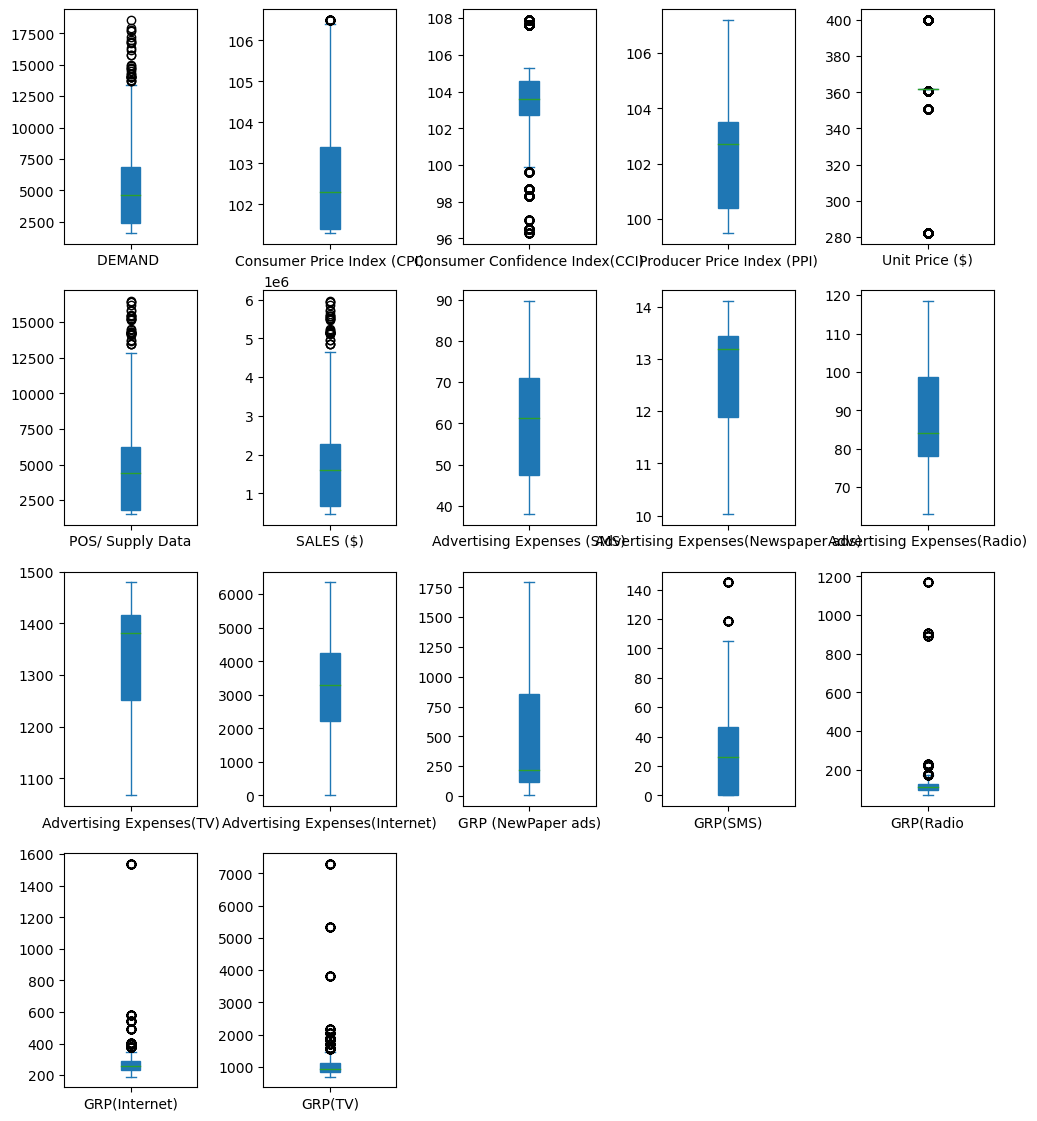

In [8]:
data.plot(subplots=True, layout=(4,5), kind='box', figsize=(12,14), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

In [9]:
# Investigating futher, using Z-score outlier detection with a theshold of 3 standard deviations.

# Function to detect outliers using Z-score
def detect_outliers_z_score(df, column, threshold=3):
    z_scores = stats.zscore(df[column])
    return df[np.abs(z_scores) > threshold]

# Detecting outliers in each numerical column using Z-score
outlier_counts = {} #Stores Value Pairs of Col name and length of outliers.
for col in data.select_dtypes(include=np.number).columns:
    outliers = detect_outliers_z_score(data, col)
    outlier_counts[col] = len(outliers)

# Calculate the percentage of outliers for each column relative to each column's total data points
outlier_percentages = {col: (count / data[col].count()) * 100 for col, count in outlier_counts.items()}

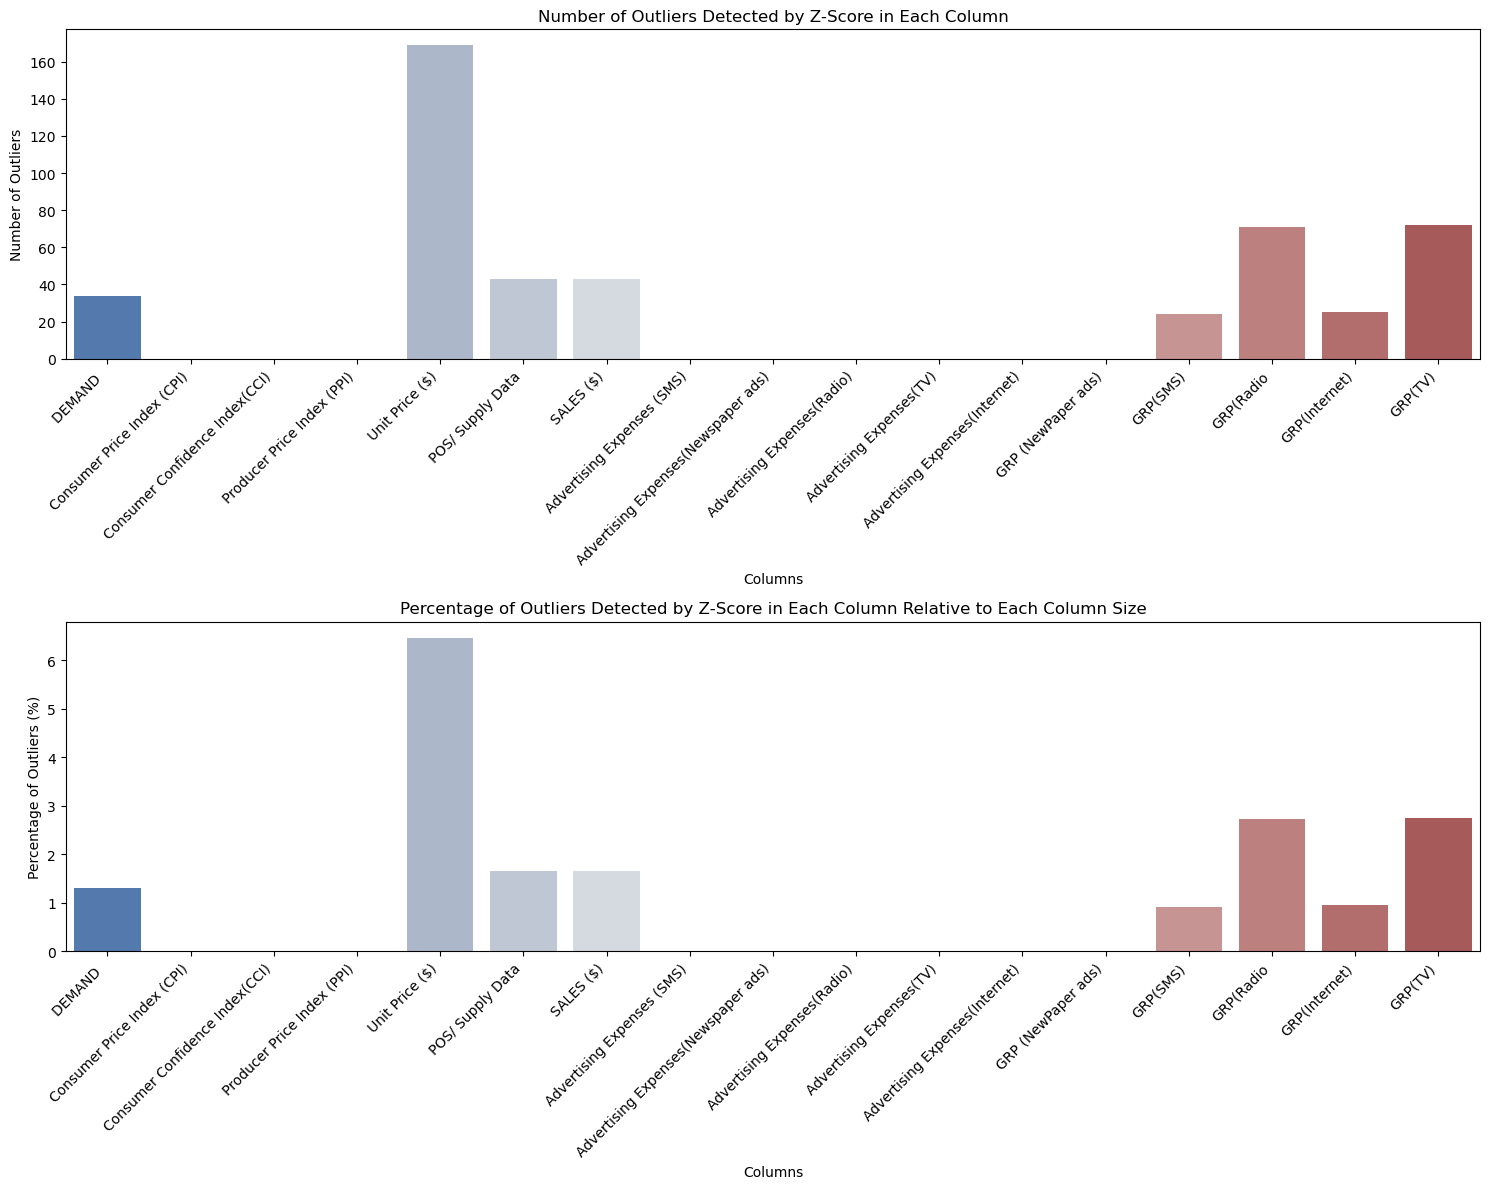

In [10]:
# Plotting the absolute number of outliers and percentage of outliers
plt.figure(figsize=(15, 12))

# Subplot for absolute number of outliers
plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
sns.barplot(x=list(outlier_counts.keys()), y=list(outlier_counts.values()), palette="vlag")
plt.xticks(rotation=45, ha='right')
plt.xlabel('Columns')
plt.ylabel('Number of Outliers')
plt.title('Number of Outliers Detected by Z-Score in Each Column')
plt.tight_layout()

# Subplot for percentage of outliers
plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd subplot
sns.barplot(x=list(outlier_percentages.keys()), y=list(outlier_percentages.values()), palette="vlag")
plt.xticks(rotation=45, ha='right')
plt.xlabel('Columns')
plt.ylabel('Percentage of Outliers (%)')
plt.title('Percentage of Outliers Detected by Z-Score in Each Column Relative to Each Column Size')
plt.tight_layout()

plt.show()

**Relatively few of the data points from the categorical variables lie outside of the 3-sigma rule range, therefore we proceed without futher treatment to the orignal dataset**

#### 2.4 Initial Feature Engineering

In [11]:
data['Year'] = data['DATE'].dt.year
data['Month'] = data['DATE'].dt.month
data['DayOfWeek'] = data['DATE'].dt.dayofweek

# Column names that correspond to advertising expenditures
ad_expenditure_columns = [
    'Advertising Expenses (SMS)', 
    'Advertising Expenses(Newspaper ads)', 
    'Advertising Expenses(Radio)', 
    'Advertising Expenses(TV)', 
    'Advertising Expenses(Internet)']


data['Total Expenditure'] = data[ad_expenditure_columns].sum(axis=1)

In [12]:
data.sample(1)

,TV Manufacturing Brand,DATE,DEMAND,Consumer Price Index (CPI),Consumer Confidence Index(CCI),Producer Price Index (PPI),Unit Price ($),POS/ Supply Data,SALES ($),Advertising Expenses (SMS),...,Advertising Expenses(Internet),GRP (NewPaper ads),GRP(SMS),GRP(Radio,GRP(Internet),GRP(TV),Year,Month,DayOfWeek,Total Expenditure
1582,TV Manufacturing & Supplier Unit,2014-05-02,2453,102.5,103.6,102.1,400.1,1581,632558.1,60.6469,...,4420.81,854.31,0.0,89.8636,226.3636,896.9545,2014,5,4,5941.749189


### 3. Exploratory Data Analysis (EDA)

Questions to answer:

1. What is the Distribution of Each Variable?
2. How Does Demand Vary Over Time?
3. How Do Different Advertising Channels Compare in Terms of Expenditure?
4. What is the Relationship Between Advertising Spend and Sales?
5. Do Economic Indicators Influence Demand or Sales?
6. What is the Distribution of GRP Across Different Media?
7. How Does Unit Price Affect Demand and Sales?
8. Is There a Correlation Between Different Marketing Metrics?

__3.1 What is the Distribution of Each Variable?__

In [13]:
# Selecting only the numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

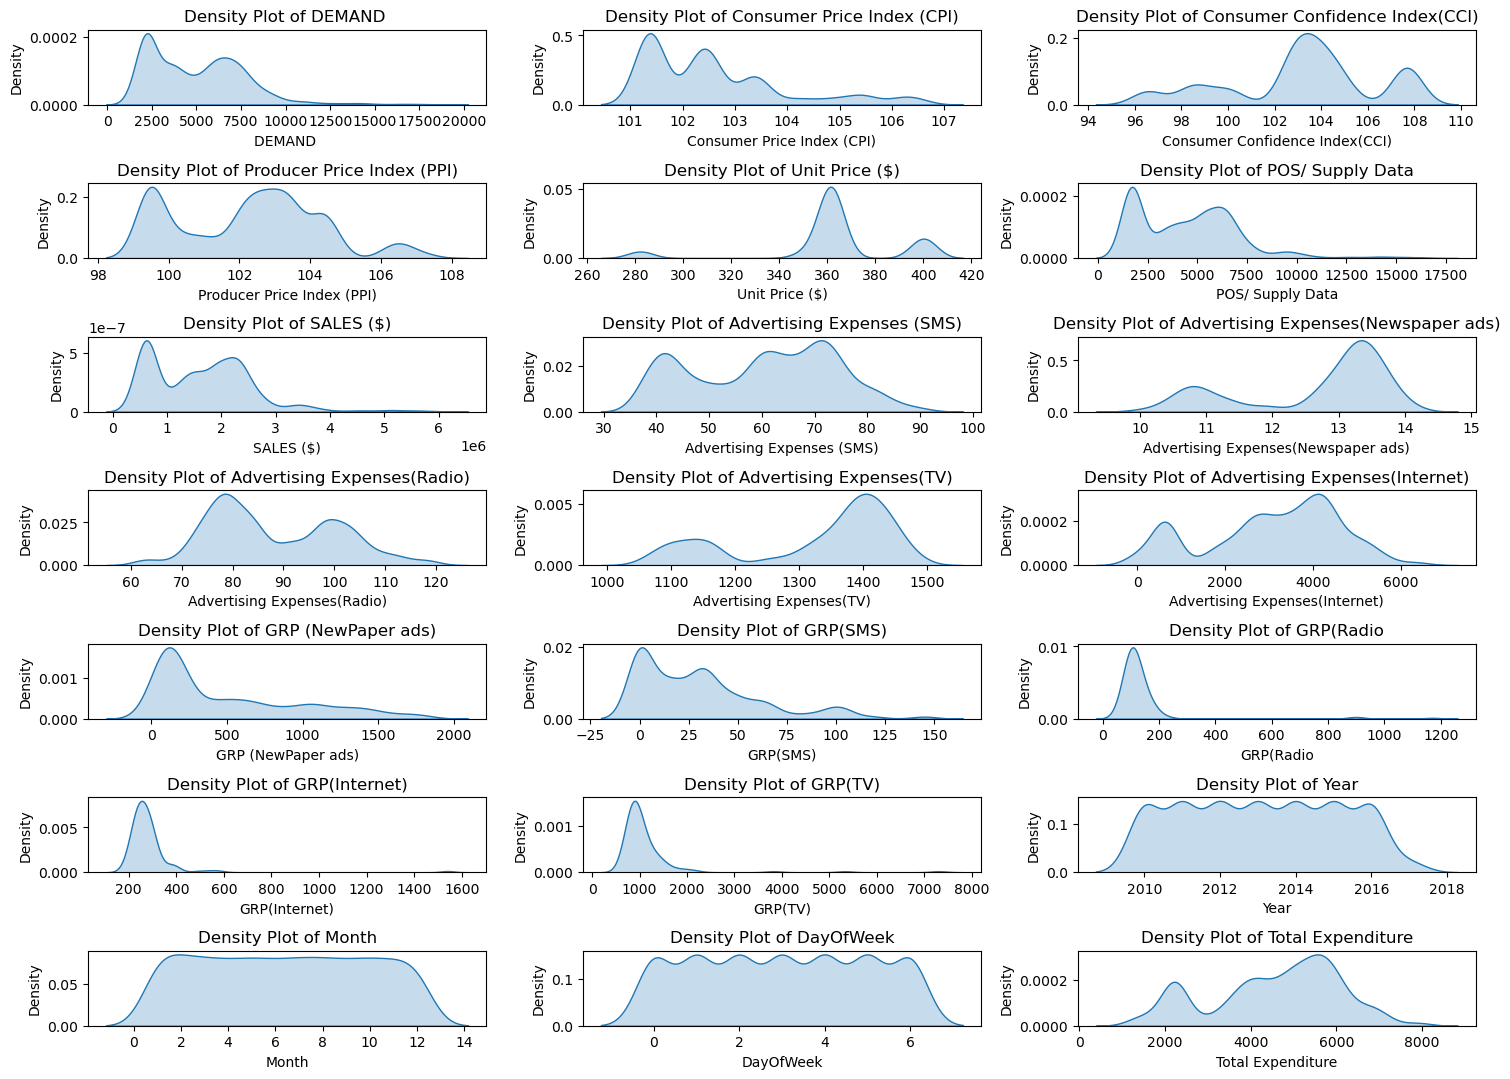

In [14]:
# Plotting the density distribution of each variable
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns) // 3 + 1, 3, i + 1)
    sns.kdeplot(data[col], fill=True)
    plt.title(f'Density Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.tight_layout()

__2. How Does Demand Vary Over Time?__


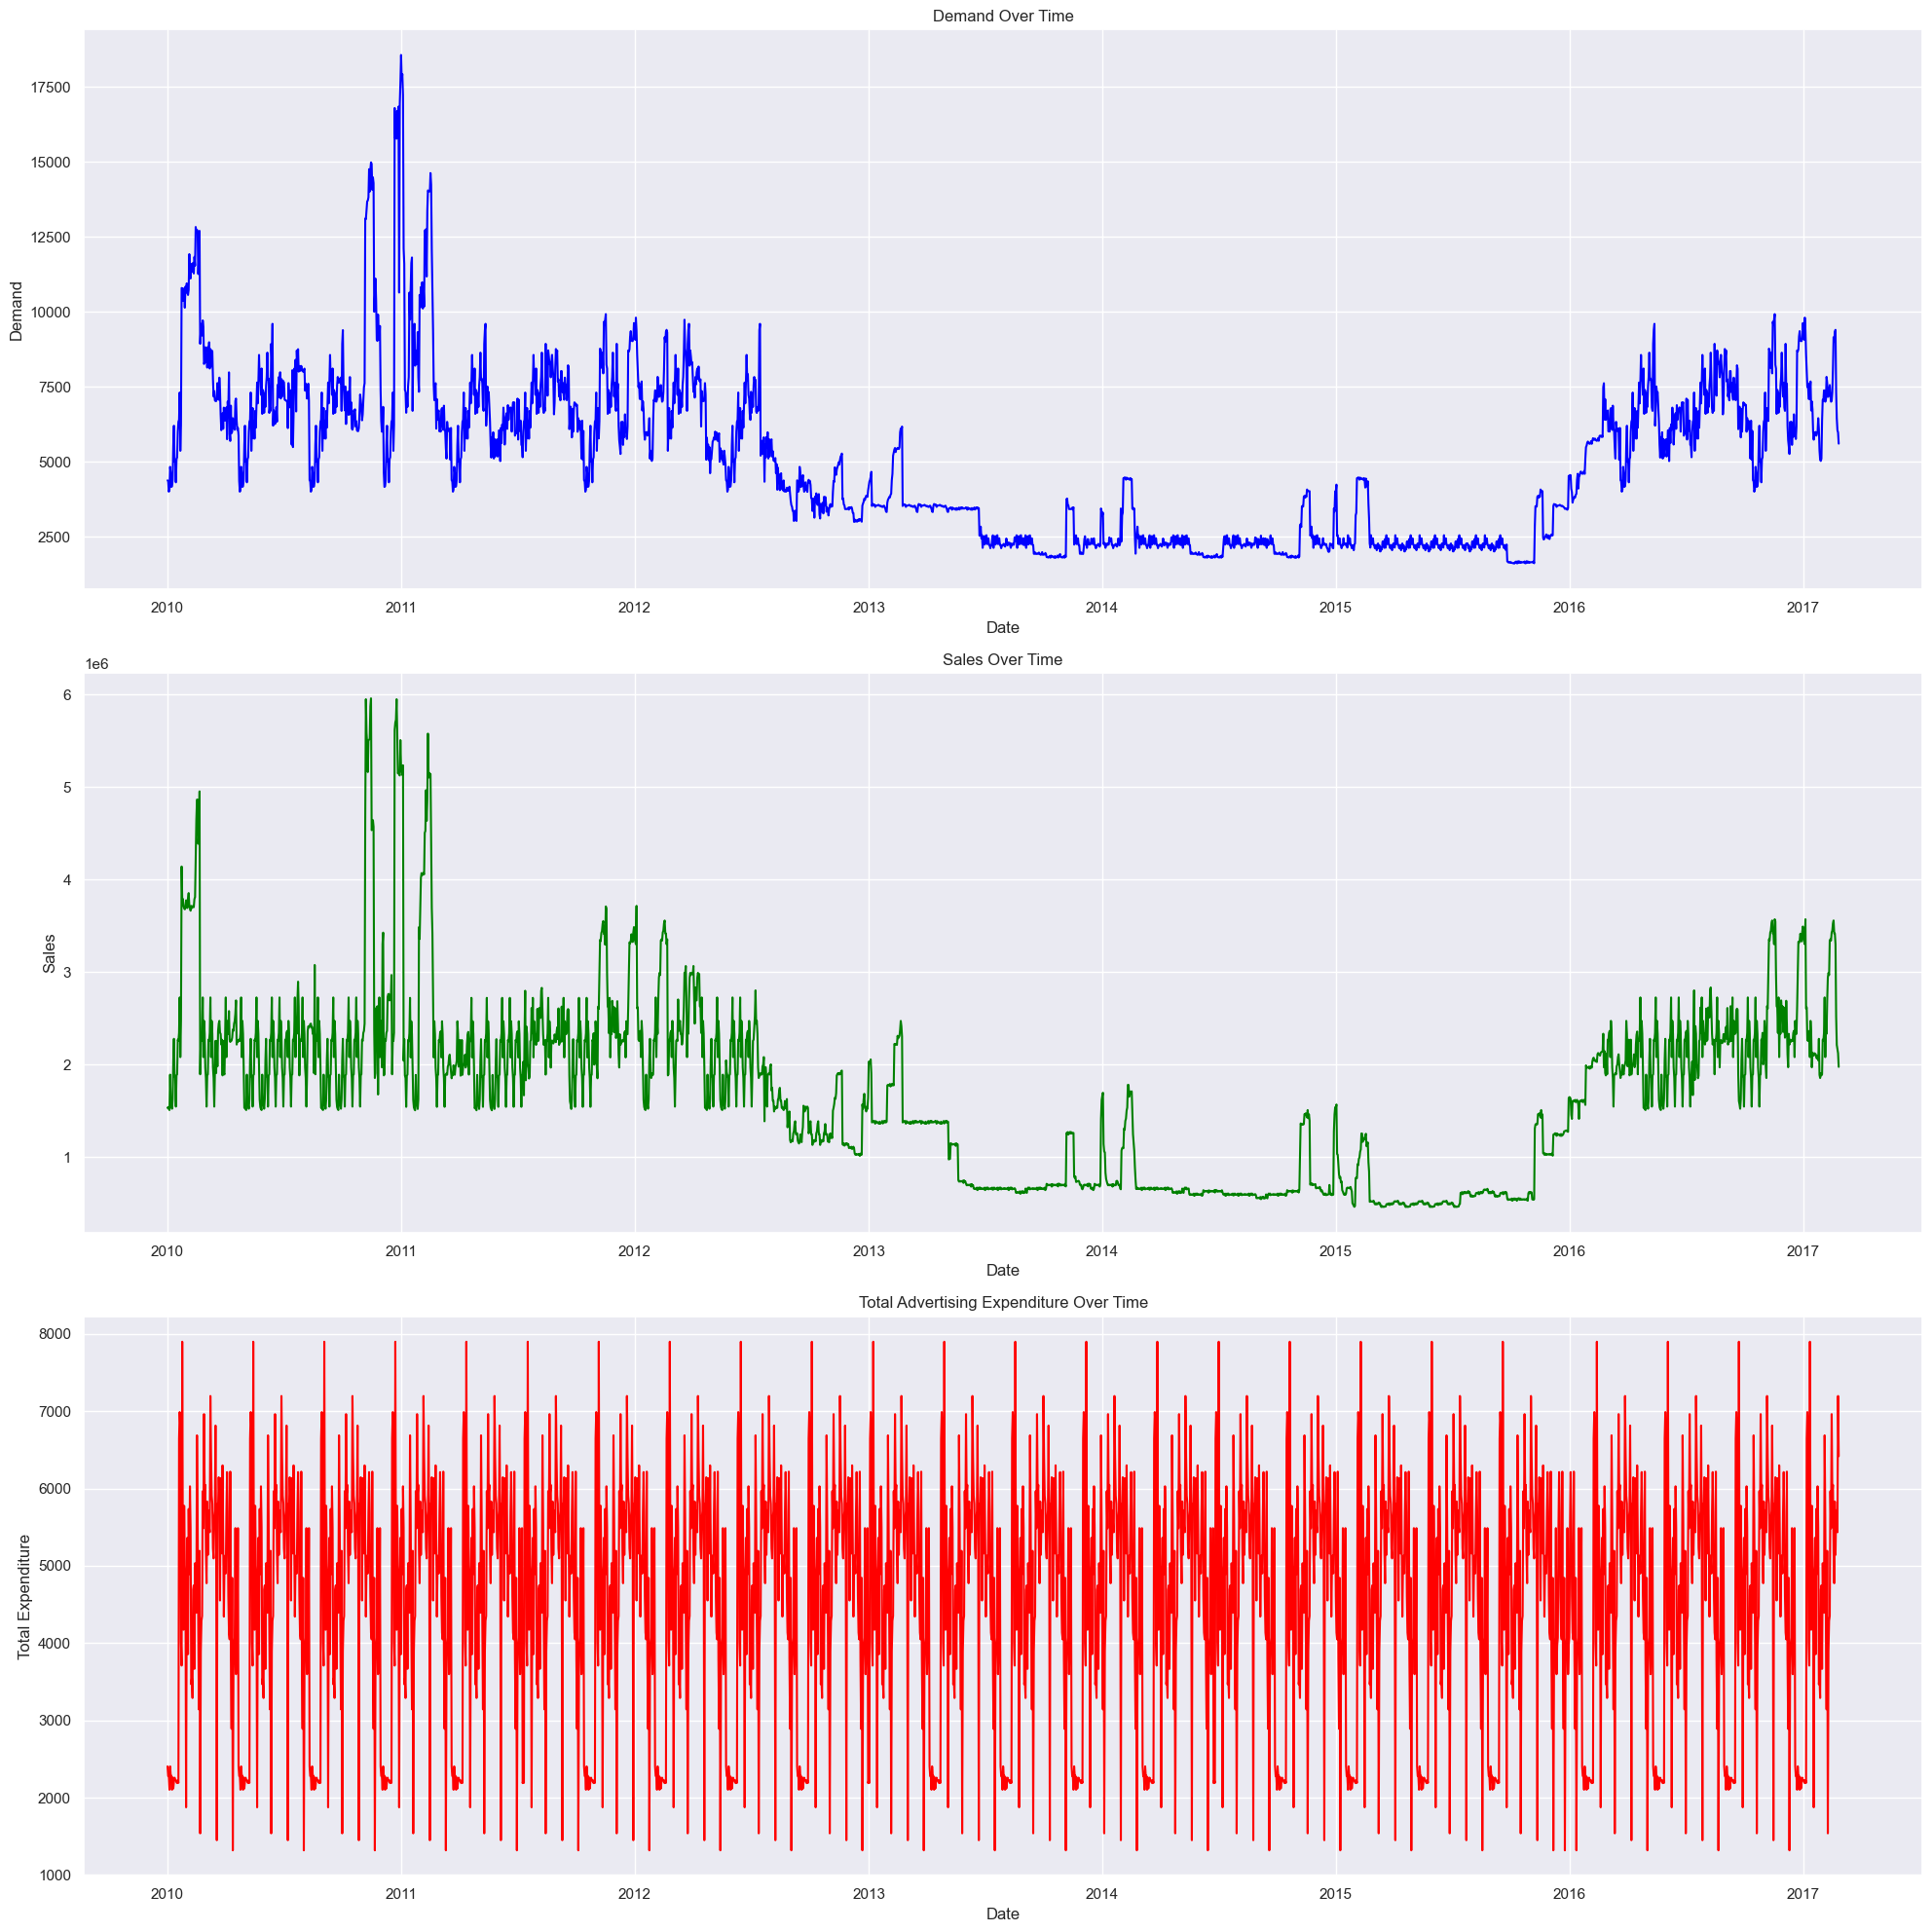

In [33]:
plt.figure(figsize=(20, 20))

plt.subplot(3,1,1)
sns.lineplot(data=data, x= 'DATE', y='DEMAND ', color = 'blue')
plt.title('Demand Over Time')
plt.xlabel('Date')
plt.ylabel('Demand')

plt.subplot(3,1,2)
sns.lineplot(data=data, x= 'DATE', y='SALES ($)', color = 'green')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')

plt.subplot(3,1,3)
sns.lineplot(data=data, x= 'DATE', y='Total Expenditure', color = 'red')
plt.title('Total Advertising Expenditure Over Time')
plt.xlabel('Date')
plt.ylabel('Total Expenditure')

plt.tight_layout()

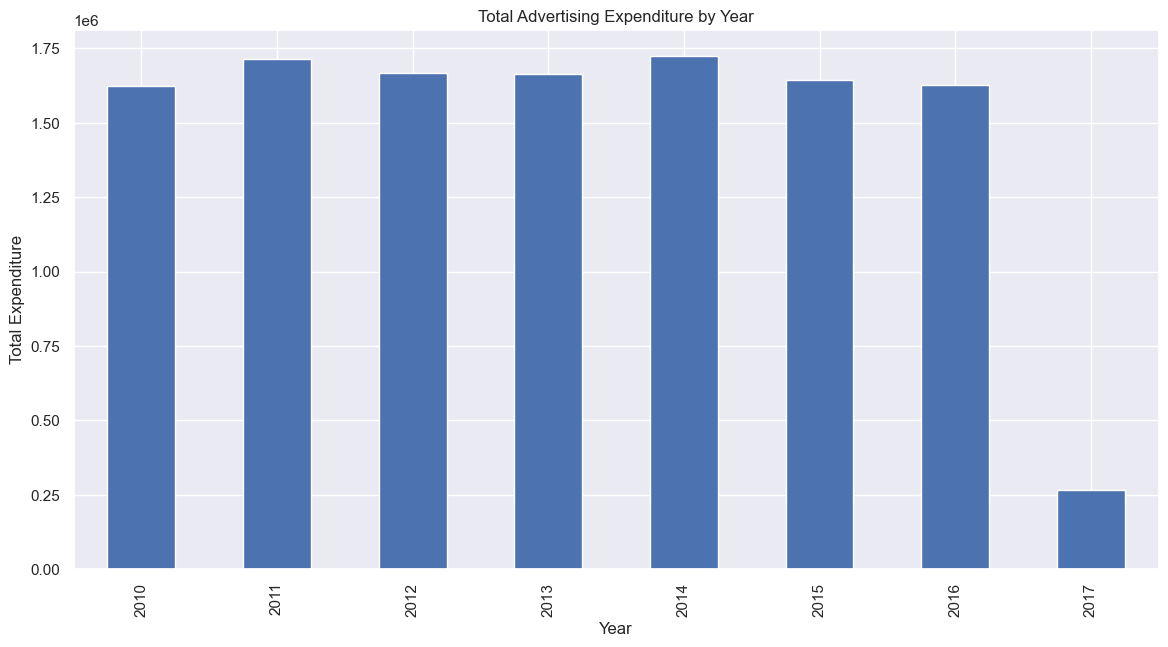

In [36]:
# Grouping by year to calculate the total expenditure per year
total_expenditure_by_year = data.groupby('Year')['Total Expenditure'].sum()

# Grouping by year and month to calculate the total expenditure per month across all years
total_expenditure_by_month = data.groupby(['Year', 'Month'])['Total Expenditure'].sum()

# To check if the total ad spend in each month is the same across years, you can group by month alone
total_expenditure_by_month_across_years = data.groupby('Month')['Total Expenditure'].sum()

# Plotting the total expenditure by year
plt.figure(figsize=(14, 7))
total_expenditure_by_year.plot(kind='bar')
plt.title('Total Advertising Expenditure by Year')
plt.xlabel('Year')
plt.ylabel('Total Expenditure')
plt.show()